In [1]:
using Plots, Random, StatsBase, DataFrames, CSV, Dates

Helpful links
How 
* [Inspiration](https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html#/cross_correlation) - Understanding Cross-Correlation, Auto-Correlation, Normalization, and Time Shift
* [Mersenne Twister](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/emt.html) - very fast randome number generator
* [Pearson Product-Moment Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) - Pearson's r : linear correlation measure
* [Plotting in Julia](https://docs.juliaplots.org/latest/tutorial/) - How to use Julia Plot package

# Auto-Correlation 


The comparison of a time series with itself at different times. Auto-Correlation is used to detect repeating patterns or "seasonality" in a time series. 


Answers questions like: 
* Can we see some sort of weekly pattern in are web performance metric?
* Is today's metric highly correlated (i.e., follow same "pattern") as same time last week?

Autocorrelations can be estimated at many lags to better assess how a time series relates to its past. We are typically most interested in how a series relates to its most recent past.

How time series with larger auto-correlation are more predictable 

How time series lagged versions relate to one another.

Compare price today with price yesterday or two days ago or 3 days ago



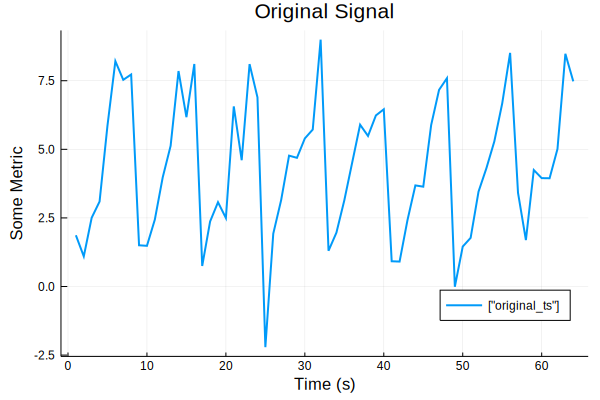

In [2]:
rng = MersenneTwister(1234);
numRepeats = 8;
autoSignal = repeat(collect(1.0:8.0), numRepeats) + randn!(rng, zeros(numRepeats*8));
x = collect(1:length(autoSignal))
plot(x,autoSignal,
     title = "Original Signal",
     label =["original_ts"],
     xlabel="Time (s)",
     ylabel="Some Metric",
     legend=:bottomright,
     linecolor = 1,
     lw =2)

##  Now to reveal the magic of Auto-Correlation

### Let's compare the original signal with the signal shifted 4 and 8 time units over

### Four time unit shifts


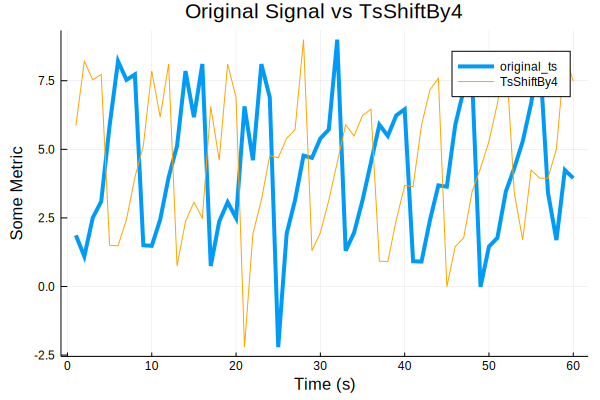

In [3]:
# Four time unit shifts
autoSignalFour = autoSignal[1:length(autoSignal)-4]
autoSignalShiftFour = autoSignal[5:length(autoSignal)]
plot(x[1:length(autoSignalShiftFour)],autoSignalFour, label="original_ts", lw=4, linecolor=1, xlabel="Time (s)",
     ylabel="Some Metric", title = "Original Signal vs TsShiftBy4")
plot!(x[1:length(autoSignalShiftFour)],autoSignalShiftFour, label="TsShiftBy4", lw=1, linecolor=:orange)


## Shift 8 Time Units

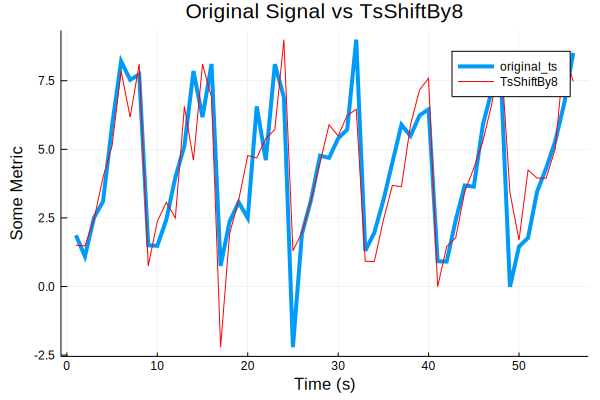

In [4]:
# Four time unit shifts
autoSignalEight = autoSignal[1:length(autoSignal)-8]
autoSignalShiftEight = autoSignal[9:length(autoSignal)]
plot(x[1:length(autoSignalShiftEight)],autoSignalEight, label="original_ts", lw=4, linecolor=1, xlabel="Time (s)",
     ylabel="Some Metric", title = "Original Signal vs TsShiftBy8")
plot!(x[1:length(autoSignalShiftEight)],autoSignalShiftEight, label="TsShiftBy8", lw=1, linecolor=:red)



In [5]:
#Computing the Correlations -- here autocorrelations (i.e., multiplying and Summing the two signals)

corr_shift4 = sum(autoSignalFour .* autoSignalShiftFour); # equals 948.4089186791925
corr_shift8 = sum(autoSignalEight .* autoSignalShiftEight); #equals 1336.0693024826921

### The time shift of 8 shows a higher correlation(auto-correlation) than a shift 4. 

Leads us to belive we have close to a detected seasonality of `8`

## Normalized Auto-Correlation bears this out even more


In [6]:
norm_auto_shift4 = sum(autoSignalFour .* autoSignalShiftFour) / sqrt(sum(autoSignalFour.^2)* sum(autoSignalShiftFour.^2));
norm_auto_shift8 = sum(autoSignalEight .* autoSignalShiftEight) / sqrt(sum(autoSignalEight.^2)* sum(autoSignalShiftEight.^2));

In [7]:
# norm_auto_shift4 = 0.6227933971623315
# norm_auto_shift8 = 0.9602671052926668  == Normalized autocorrelation makes it very obvious

---

----

# Cross Correlation

Cross correlation is the comparison of two different time series (not the same one as in auto) to detect if there is a correlation between metrics with the same maximum and minimum values.


"Are two audio signals in phase"

Cross correlation detects the level of correlation between the two signals. 

Simple calculation: multiply the elements of the time series together and summing the results



$$corr(x, y) = \sum_{n=0}^{n-1} x[n]*y[n]$$
 

sample data set taken from 
https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html#/cross_correlation

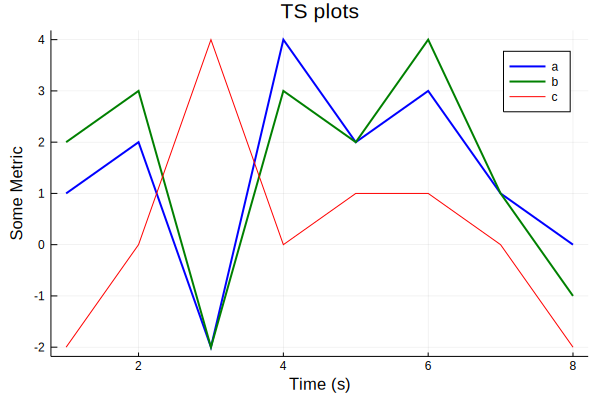

In [8]:
a = [1,2,-2,4,2,3,1,0];
b = [2,3,-2,3,2,4,1,-1];
c = [-2,0,4,0,1,1,0,-2];

time = collect(1:length(a));

plot(time, a, label="a", lw=2, linecolor=:blue, xlabel="Time (s)",
     ylabel="Some Metric", title = "TS plots")
plot!(time, b, label="b", lw=2, linecolor=:green)
plot!(time, c, label="c", lw=1, linecolor=:red)




$$corr(x, y) = \sum_{n=0}^{n-1} x[n]*y[n]$$

$$\begin{align}
corr(a, b) & = 1*2+2*3+-2*-2+4*3+2*2+3*4+1*1+0*-1 \\
& = 41
\end{align}$$

$$\begin{align}
corr(a, c) & =1*-2+2*0+-2*4+4*0+2*1+3*1+1*0+0*-2 \\
& =-5
\end{align}$$


See that raw calculation does not take into account Amplitudes so even scaled signal with zero lag 
does not accurately correlate

$$\begin{align}
corr(a, a/2) & =1*(1/2)+2*(2/2)+-2*(-2/2)+4*(4/2)+2*(2/2),3*(3/2)+1*(1/2)+0*(0/2)\\
& =19.5
\end{align}$$


### Time Series A and Time Series B have a higher cross-correlation value of 41
### Time Series A and Time Series C have a lower cross-correlation value of -5

In [9]:
corr_ab = sum(a.*b); # equals 41
corr_ac = sum(a.*c); # equals -5

In [10]:
corr_a_half_a = sum(a.*(a/2)) # equals 19.5

19.5

#  Normalized Cross-Correlation

Cause we cross-correlations has a few issues
(come on you did not think it was going to be that easy)

* 1 it is difficult to understand the scoring value 41 vs -5 for this case
* 2 both metrics must have the same amplitude. if time Series B has the same shape as time series A, but values two times smaller, the correlation will not be detected. example corr(a,a/2) = 19.5
* 3 Due to the formula, a zero value will not be taken into account since 0 * 0 = 0 or 0 * Any Number = 0


Normalization alleviates these issues so we can compare.

$$norm\_corr(x,y)=\dfrac{\sum_{n=0}^{n-1} x[n]*y[n]}{\sqrt{\sum_{n=0}^{n-1} x[n]^2 * \sum_{n=0}^{n-1} y[n]^2}}$$

$$norm\_corr(x,y)= Pearson Correlation Coefficient$$

Using this formula let’s compute the normalized cross-correlation of ab and ac.

$$\begin{align}
norm\_corr(a,b) &= \dfrac{1*2+2*3+-2*-2+4*3+2*2+3*4+1*1+0*-1}{\sqrt{(1+4+4+16+4+9+1+0)*(4+9+4+9+4+16+1+1)}} \\
& = \dfrac{41}{\sqrt{(39)*(48)}} \\
& = 0.947
\end{align}$$

$$\begin{align}
norm\_corr(a,c) & =\dfrac{1*-2+2*0+-2*4+4*0+2*1+3*1+1*0+0*-2}{\sqrt{(1+4+4+16+4+9+1+0)*(4+0+16+0+1+1+0+4)}} \\
& =\dfrac{-5}{\sqrt{(39)*(26)}} \\
& =-0.157
\end{align}$$


In statistics, the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/), also referred to as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC) or the bivariate correlation,[1] is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation

# Interpretation
The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables.

More generally, note that (Xi − X)(Yi − Y) is positive if and only if Xi and Yi lie on the same side of their respective means. Thus the correlation coefficient is positive if Xi and Yi tend to be simultaneously greater than, or simultaneously less than, their respective means. The correlation coefficient is negative (anti-correlation) if Xi and Yi tend to lie on opposite sides of their respective means. Moreover, the stronger is either tendency, the larger is the absolute value of the correlation coefficient.



Pearson's distance
A distance metric for two variables X and Y known as Pearson's distance can be defined from their correlation coefficient as

$$\begin{align}
d_{X,Y}=1-\rho _{X,Y} 
\end{align}$$

Considering that the Pearson correlation coefficient falls between [−1, 1], the Pearson distance lies in [0, 2]. The Pearson distance has been used in cluster analysis and data detection for communications and storage with unknown gain and offse.

In [11]:
# Normalized norm_corr(a,a) = 1:
proof = sum(a .* (a)) / sqrt(sum(a.^2) * sum(a.^2))

1.0

In [12]:
# Normalized norm_corr(a,-a) = -1:
proof = sum(a .* (-a)) / sqrt(sum(a.^2) * sum(((-a).^2)))

-1.0

In [13]:
# Normalized cross-correlation can detect the correlation of two signals with different amplitudes:
# Notice we have perfect correlation between signal A and the same signal with half the amplitude!

proof = sum(a .* (a/2)) / sqrt(sum(a.^2) * sum((a./2).^2))

1.0

In [14]:
norm_corr_ab = sum(a .* (b)) / sqrt(sum(a.^2) * sum(b.^2)); # equals  0.947
norm_corr_ac = sum(a .* (c)) / sqrt(sum(a.^2) * sum(c.^2)); # equals -0.157

In [15]:
norm_corr_ab

0.9476128352180997

In [17]:
crosscor(a,-a, [0]) #lags = 0.0 - Julia functions
acf = autocor(x, 1:20) 

20-element Array{Float64,1}:
 0.953125
 0.9062957875457875
 0.8595581501831502
 0.8129578754578755
 0.7665407509157509
 0.7203525641025641
 0.6744391025641026
 0.6288461538461538
 0.5836195054945055
 0.538804945054945
 0.4944482600732601
 0.4505952380952381
 0.40729166666666666
 0.3645833333333333
 0.32251602564102566
 0.28113553113553114
 0.24048763736263737
 0.20061813186813188
 0.1615728021978022
 0.1233974358974359

----

# Correlation with Time Shift

All correlation techniques can be modified by applying a time shift. For example, it is very common to perform a normalized cross-correlation with time shift to detect if a signal “lags” or “leads” another.

To process a time shift, we correlate the original signal with another one moved by x elements to the right or left. Just as we did for auto-correlation.

To detect if two metrics are correlated with a time shift we need to compute all the possible time shifts. Fortunately, the Julia language can compute all the correlations with time shift very quickly.

using the `cross.corr function`



Autocorrelations or lagged correlations are used to assess whether a time series is dependent on its past. For a time series x of length n we consider the n-1 pairs of observations one time unit apart. The first such pair is (x[2],x[1]), and the next is (x[3],x[2]). Each such pair is of the form (x[t],x[t-1]) where t is the observation index, which we vary from 2 to n in this case. The lag-1 autocorrelation of x can be estimated as the sample correlation of these (x[t], x[t-1]) pairs.


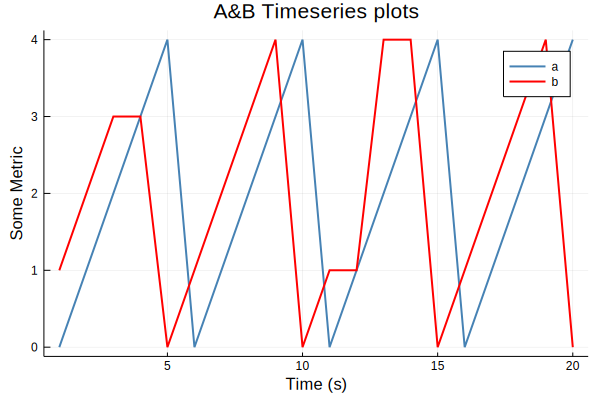

In [19]:
a = [0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]
b = [1,2,3,3,0,1,2,3,4,0,1,1,4,4,0,1,2,3,4,0]
time = collect(1:length(a));

plot(time, a, label="a", lw=2, linecolor=:steelblue, xlabel="Time (s)",
     ylabel="Some Metric", title = "A&B Timeseries plots")
plot!(time, b, label="b", lw=2, linecolor=:red)



When left unspecified, the lags used are the integers from -min(size(x,1)-1, 10*log10(size(x,1))) to min(size(x,1), 10*log10(size(x,1))).

In [20]:

r = crosscor(b, a, collect(-4:4))
#plot(Plots.bar(r), linecolor=:steelblue, xlabel="Lag", ylabel="CCF", title = "CrossCorr of A & B")


9-element Array{Float64,1}:
  0.8623200383824144
  0.02100206397206454
 -0.5472890788014465
 -0.42251211049682774
 -3.291808233379273e-17
  0.8672617004934883
  0.12724779936015573
 -0.4657516539687252
 -0.39286213783038365

In [21]:
ccf_df = DataFrame(ccf_lag = collect(-4:4), ccfValue = r)

,ccf_lag,ccfValue
,Int64,Float64
1,-4,0.86232
2,-3,0.0210021
3,-2,-0.547289
4,-1,-0.422512
5,0,-3.29181e-17
6,1,0.867262
7,2,0.127248
8,3,-0.465752
9,4,-0.392862


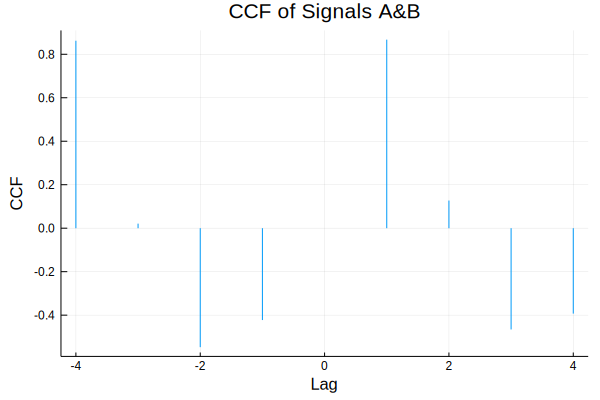

In [22]:
#Plot Correlograms in Julia
plot(ccf_df[!,:ccf_lag], ccf_df[!,:ccfValue], line = :sticks, legend=false,
     xlabel="Lag", ylabel="CCF", title = "CCF of Signals A&B", )

# Normalized Auto Correlation Time-Shifted


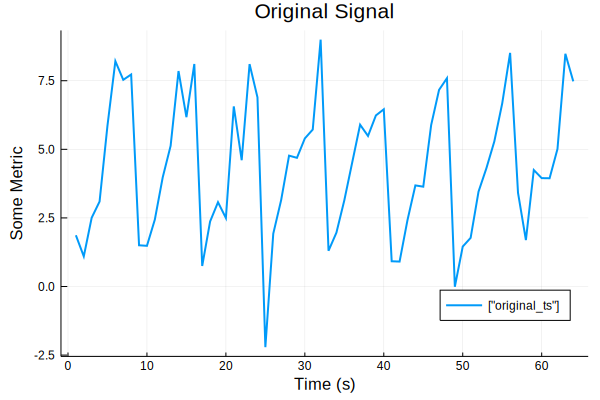

In [23]:
rng = MersenneTwister(1234);
numRepeats = 8;
autoSignal = repeat(collect(1.0:8.0), numRepeats) + randn!(rng, zeros(numRepeats*8));
x = collect(1:length(autoSignal))
plot(x,autoSignal,
     title = "Original Signal",
     label =["original_ts"],
     xlabel="Time (s)",
     ylabel="Some Metric",
     legend=:bottomright,
     linecolor = 1,
     lw =2)

In [24]:
auto_r = autocor(autoSignal, collect(1:8));
#plot(Plots.bar(auto_r), linecolor=:steelblue, xlabel="Lag", ylabel="ACF", title = "ACF of Signal")


In [25]:
# The output repeats every 8 datapoints. As 
# expected the auto correlation detects a high correlation when the series is
# compared to itself a time shift of 8

In [26]:
acf_df = DataFrame(lag = collect(1:8), acfValue = auto_r)

,lag,acfValue
,Int64,Float64
1,1,0.353117
2,2,-0.0659904
3,3,-0.347516
4,4,-0.48397
5,5,-0.36758
6,6,-0.1726
7,7,0.255374
8,8,0.744855


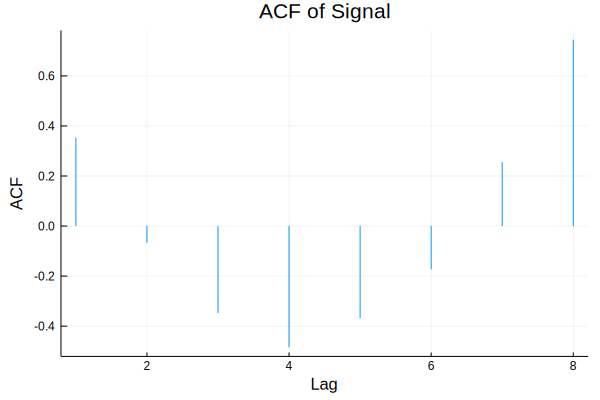

In [27]:
#Plot Correlograms in Julia
plot(acf_df[!,:lag], acf_df[!,:acfValue], line = :sticks, legend=false,
     xlabel="Lag", ylabel="ACF", title = "ACF of Signal", )

-----

----

# Detecting Anomalies in Correlated Time Series 

https://anomaly.io/detect-anomalies-in-correlated-time-series/index.html

Monitoring key performance indicators (KPIs), sales or any other product data means working within an ecosystem where very often you will see metrics correlating with each other. When a normal correlation between two metrics is broken, we have reason to suspect something strange is happening.

In the graphic below, the new users are shown in blue and the returning users in red. Clearly, something strange happens in the middle of November. Let’s use some techniques to find out more!

In [28]:
visitorDF = CSV.read("new-vs-returning-visitor.csv");
names(visitorDF)
first(visitorDF,6)

,Day_Index,Date_Range,Segment,Sessions
,String,String,String,Int64
1,10/1/15,"Oct 1, 2015 - Jan 23, 2017",New Users,46
2,10/1/15,"Oct 1, 2015 - Jan 23, 2017",Returning Users,36
3,10/2/15,"Oct 1, 2015 - Jan 23, 2017",New Users,44
4,10/2/15,"Oct 1, 2015 - Jan 23, 2017",Returning Users,21
5,10/3/15,"Oct 1, 2015 - Jan 23, 2017",New Users,12
6,10/3/15,"Oct 1, 2015 - Jan 23, 2017",Returning Users,15


In [29]:
new_data_df = visitorDF[visitorDF[!,:Segment] .== "New Users", [:Day_Index, :Date_Range, :Sessions]];
return_data_df = visitorDF[visitorDF[!,:Segment] .== "Returning Users", [:Day_Index, :Date_Range, :Sessions]];

In [30]:
#lets convert the day_index to just the month
begin
    new_data_df[!,:month] = map(x -> Dates.monthabbr(Dates.DateTime(x, "mm/dd/yy")), new_data_df[!,:Day_Index]);
    new_data_df;
end

begin
    return_data_df[!,:month] = map(x -> Dates.monthabbr(Dates.DateTime(x, "mm/dd/yy")), return_data_df[!,:Day_Index]);
    return_data_df;
end
#

,Day_Index,Date_Range,Sessions,month
,String,String,Int64,String
1,10/1/15,"Oct 1, 2015 - Jan 23, 2017",36,Oct
2,10/2/15,"Oct 1, 2015 - Jan 23, 2017",21,Oct
3,10/3/15,"Oct 1, 2015 - Jan 23, 2017",15,Oct
4,10/4/15,"Oct 1, 2015 - Jan 23, 2017",11,Oct
5,10/5/15,"Oct 1, 2015 - Jan 23, 2017",19,Oct
6,10/6/15,"Oct 1, 2015 - Jan 23, 2017",23,Oct
7,10/7/15,"Oct 1, 2015 - Jan 23, 2017",28,Oct
8,10/8/15,"Oct 1, 2015 - Jan 23, 2017",29,Oct
9,10/9/15,"Oct 1, 2015 - Jan 23, 2017",25,Oct


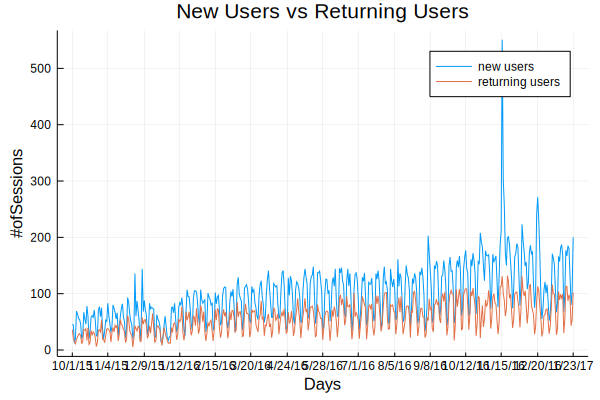

In [31]:

plot(new_data_df[!,:Day_Index], new_data_df[!,:Sessions],
     xlabel="Days", ylabel="#ofSessions", title = "New Users vs Returning Users",
     label="new users")
plot!(return_data_df[!,:Day_Index], return_data_df[!,:Sessions], label="returning users")



# Let's talk about the Correlation 

First let's see what can cross-correlation tell us

IF you want you can smooth out the signals first to reduce outliers and also check for `na's`

https://juliaquant.github.io/MarketTechnicals.jl/latest/ma.html#Simple-Moving-Average-1

In [32]:
#Get rid of missing values
dropmissing!(new_data_df);
dropmissing!(return_data_df);

In [33]:
crosscor(new_data_df[!,:Sessions], return_data_df[!,:Sessions], [0])

1-element Array{Float64,1}:
 0.8371268696198125

In [34]:
# Subtract the time Series
multi = sum(new_data_df[!,:Sessions]/return_data_df[!,:Sessions])/ length(return_data_df[!,:Sessions])
multi #display 1.40732
align_return_data = return_data_df[!,:Sessions].*multi;



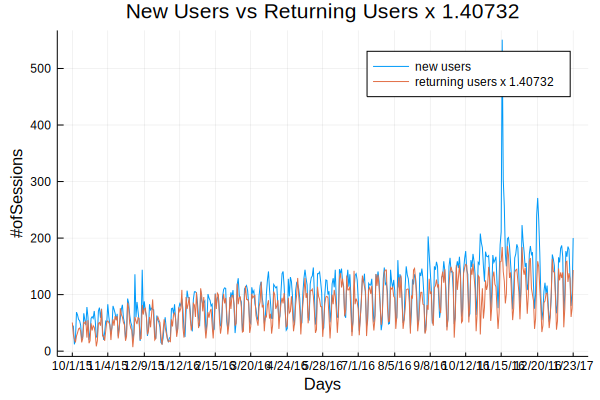

In [35]:
plot(new_data_df[!,:Day_Index], new_data_df[!,:Sessions],
     xlabel="Days", ylabel="#ofSessions", title = "New Users vs Returning Users x 1.40732",
     label="new users")
plot!(return_data_df[!,:Day_Index], align_return_data, label="returning users x 1.40732  ")



In [36]:
subtractTs = new_data_df[!,:Sessions] - align_return_data;


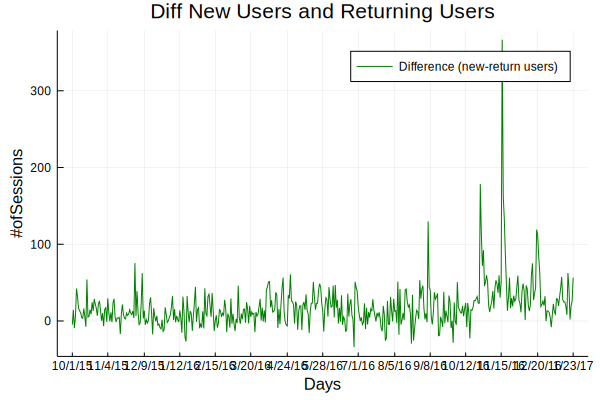

In [37]:
plot(return_data_df[!,:Day_Index], subtractTs,
     xlabel="Days", ylabel="#ofSessions", title = "Diff New Users and Returning Users",
     label="Difference (new-return users)", linecolor=:green)

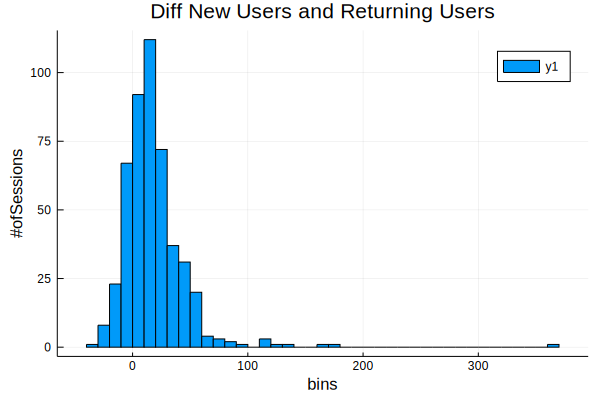

In [38]:
# Finding Outliers in Correlated Time Series
histogram(subtractTs, xlabel="bins", ylabel="#ofSessions", title = "Diff New Users and Returning Users")

In [39]:
sub_mean, sub_std = mean_and_std(subtractTs); #equals 18.469 and 29.165085238738357

# Finding Outliers Using Concept of 3-sigma Rule

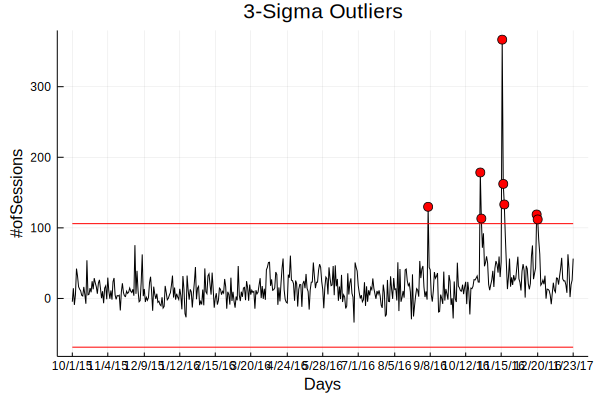

In [40]:
# Compute 3 sigma minimal & maximal
max = sub_mean + 3 * sub_std; # 105.96441166568002
min = sub_mean - 3 * sub_std; # -69.02609976675012


positionDF = DataFrame(index= collect(1:length(subtractTs)), value=subtractTs, date = return_data_df[!,:Day_Index])
anomH = positionDF[positionDF[:, :value].> max, :]



#Plot metric & Limit
plot(return_data_df[!,:Day_Index], subtractTs,
     xlabel="Days", ylabel="#ofSessions", title = "3-Sigma Outliers",
     legend=false, linecolor=:black)
plot!(return_data_df[!,:Day_Index], ones(length(subtractTs)).* max, linecolor=:red)
plot!(return_data_df[!,:Day_Index], ones(length(subtractTs)).* min, linecolor=:red)

plot!(anomH[!, :date], anomH[!, :value], line=:scatter, markercolor=:red, markersize=5)


In [41]:
positionDF = DataFrame(index= collect(1:length(subtractTs)), value=subtractTs, date = return_data_df[!,:Day_Index])
anomH = positionDF[positionDF[:, :value].> max, :]



,index,value,date
,Int64,Float64,String
1,342,129.819,9/6/16
2,392,178.446,10/26/16
3,393,113.19,10/27/16
4,413,366.641,11/16/16
5,414,162.268,11/17/16
6,415,133.155,11/18/16
7,446,118.97,12/19/16
8,447,111.972,12/20/16


----


## Dot Product

$$a = [a_1, a_2,..., a_n]$$



$$b = [b_1, b_2,..., b_n]$$



$$a \bullet b = \sum_{i=1}^{n} a_i b_i = a_1 b_1 + a_2 b_2 + ... + a_n b_n$$


$$\begin{align}
[1, 3, -5]\bullet[4,-2, -1] = (1 \times 4) + (3 \times -2) + (-5 \times -1) \\
&= 4 - 6 + 5 \\
&= 3
\end{align}$$



### Standard deviation of Zero

Means that 
$$(x_i - x)^2 = 0$$

Such that every data value is equal to the mean. Std deviation of data set is zero if an only if all of its values are identical. 

In [42]:
mean_and_std([24,24])

(24.0, 0.0)